In [200]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [201]:
# read Excel file
df = pd.read_excel('all.xlsx', header=0,index_col='Name')
df.dropna(how='all', inplace=True)
#df.drop(df.tail(1).index, inplace=True)
#df.drop('Unnamed: 10', axis=1, inplace=True)
df = df.drop(df[df['Rank'] > 1500].index)
one_hot = pd.get_dummies(df['Gallery'])
df.drop('Gallery', axis=1, inplace=True)
df = pd.concat([df, one_hot], axis=1)
dumdums = df.iloc[:, -11:]

In [205]:
# Run the model 

#X_Cols = df["First show"]
X_Cols = pd.concat([dumdums],axis=1)
#X_Cols = pd.concat([df['Total shows with gallery'], df['Artist Age'],df['Years toget her'],df['Artist Age'], dumdums],axis=1)
#X_Cols = pd.concat([df['Total shows with gallery'], df['Artist Age'],df['Years toget her'],df['Most recent']], axis=1)
#X_Cols = pd.concat([df['Years toget her']], axis=1)
#X_Cols = pd.concat([df['Years toget her'],df['Artist Age'],df['Male '], df['Female']], axis=1)
Y_Col = df['Rank']
X = X_Cols
y = Y_Col
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     1.239
Date:                Fri, 17 Feb 2023   Prob (F-statistic):              0.430
Time:                        21:05:48   Log-Likelihood:                -112.08
No. Observations:                  16   AIC:                             246.2
Df Residuals:                       5   BIC:                             254.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

C:\Users\JulianHilgemann(Bilt\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


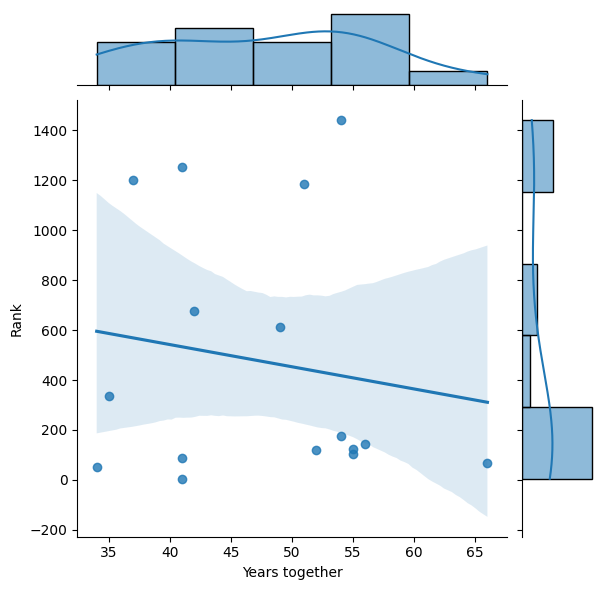

In [204]:
sns.jointplot(x=df['Years together'], y=df['Rank'], data=df, kind="reg")

In [151]:
df

,Rank,First name,Last name,Years toget her,Artist Age,Total shows with gallery,First show,Most recent,Male,Female,Galerie Buchholz,Galerie Jean Fournier,Gow Langsford Gallery,Leo Castelli Gallery,Metro Pictures,Pace Gallery,Paula Cooper Gallery,Ronald Feldman Gallery
Name,,,,,,,,,,,,,,,,,,
Jasper Johns,67,Jasper,Johns,66,93,83,1957,2022,1,0,0,0,0,1,0,0,0,0
Jim Dine,144,Jim,Dine,56,88,70,1961,2013,1,0,0,0,0,0,0,1,0,0
Carl Andre,104,Carl,Andre,55,88,55,1968,2022,1,0,0,0,0,0,0,0,1,0
Frank Stella,124,Frank,Stella,55,87,84,1959,2013,1,0,0,0,0,1,0,0,0,0
Joseph Kosuth,118,Joseph,Kosuth,52,78,50,1971,2020,1,0,0,0,0,1,0,0,0,0
Claude Viallat,612,Claude,Viallat,49,87,26,1973,2016,1,0,0,1,0,0,0,0,0,0
Lynda Benglis,174,Lynda,Benglis,54,82,22,1969,2018,0,1,0,0,0,0,0,0,1,0
Eleanor Antin,675,Eleanor,Antin,42,88,24,1977,2018,0,1,0,0,0,0,0,0,0,1
Cindy Sherman,5,Cindy,Sherman,41,69,49,1980,2020,0,1,0,0,0,0,1,0,0,0


In [198]:
df.sort_values(by=['Rank'])

,Rank,First name,Last name,Years toget her,Artist Age,Total shows with gallery,First show,Most recent,Male,Female,...,Galerie Jean Fournier,Gow Langsford Gallery,Leo Castelli Gallery,Metro Pictures,Pace Gallery,Paula Cooper Gallery,Produzentengalerie Hamburg,Ronald Feldman Gallery,Waddington Custot Galleries,Zeno X Gallery
Name,,,,,,,,,,,,,,,,,,,,,
Cindy Sherman,5,Cindy,Sherman,41,69,49,1980,2020,0,1,...,0,0,0,1,0,0,0,0,0,0
Isa Genzken,50,Isa,Genzken,34,75,21,1987,2020,0,1,...,0,0,0,0,0,0,0,0,0,0
Jasper Johns,67,Jasper,Johns,66,93,83,1957,2022,1,0,...,0,0,1,0,0,0,0,0,0,0
Louise Lawler,89,Louise,Lawler,41,76,45,1981,2021,0,1,...,0,0,0,1,0,0,0,0,0,0
Carl Andre,104,Carl,Andre,55,88,55,1968,2022,1,0,...,0,0,0,0,0,1,0,0,0,0
Joseph Kosuth,118,Joseph,Kosuth,52,78,50,1971,2020,1,0,...,0,0,1,0,0,0,0,0,0,0
Frank Stella,124,Frank,Stella,55,87,84,1959,2013,1,0,...,0,0,1,0,0,0,0,0,0,0
Jim Dine,144,Jim,Dine,56,88,70,1961,2013,1,0,...,0,0,0,0,1,0,0,0,0,0
Lynda Benglis,174,Lynda,Benglis,54,82,22,1969,2018,0,1,...,0,0,0,0,0,1,0,0,0,0
